In [30]:
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly.tools as tls

tls.set_credentials_file(username='jmpichar', api_key='6j8xqqVZuzkahnBKzJDk')
plotly.offline.init_notebook_mode(connected=True)


## Load CSV of diabetes data from 2004 to 2013

In [31]:
#states_df = pd.read_csv('./Resources/DM_PREV_ALL_STATES.csv')
states_df = pd.read_csv('./Resources/us_diabetes_2004_2013.csv')
states_df.head(3)

,State,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Alabama,9.946269,10.505970,11.656716,12.474627,13.055224,13.897015,14.082090,14.477612,15.040299,15.489552
1,Alaska,5.366667,5.766667,5.716667,6.166667,6.450000,6.933333,7.283333,6.783333,6.816667,6.700000
2,Arizona,7.673333,8.000000,8.560000,9.106667,9.413333,9.960000,10.080000,10.460000,10.600000,11.093333


## Load CSV with State Abbreviations

In [32]:
abrev_df = pd.read_csv('./Resources/list-states-abbreviation.csv')
abrev_df = abrev_df[['State','Abbr.']].set_index('State')

### Add column with State code

In [33]:
states_df['code'] = 'NA'

## Update State Codes

In [34]:
for index,row in states_df.iterrows():
    state = row['State']
    #county = row['County']
    abrev = abrev_df.loc[state][0]
    states_df.loc[index, 'code'] = abrev
    #print(f'{state}: abreviation: {abrev}')
    

In [35]:
scl = [
    [0.0, 'rgb(255,215,0)'],
    [0.25, 'rgb(255,165,0)'],
    [0.5,  'rgb(255,135,0)'],
    [0.75, 'rgb(255,75,0)'],
    [1.0,  'rgb(255,45,0)']
]

In [36]:
#states_df = states_df[~(states_df['2013'] == 'No Data')]
#states_df.to_csv('./Resources/tst_diabetes_states.csv')
#states_df[states_df['FIPS Codes'] == 27071]
#states_df

In [37]:
data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states_df['code'],
    z = states_df['2013'].astype(float),
    locationmode = 'USA-states',
    text = states_df['State'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Thousands USD")
)]

In [38]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'Diabetes Prevalance in the US by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = dict(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(66, 165, 245)'),
)

In [43]:
#fig = dict(data=data, layout=layout)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='d3-cloropleth-map')

/home/jmpichar/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Show Prevalence Over Time

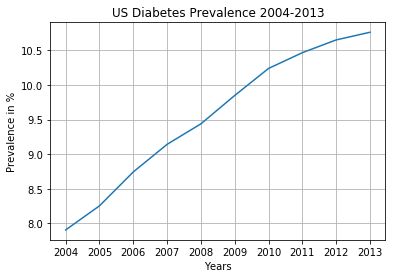

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
line = states_df.mean()


fig, ax = plt.subplots()
ax.plot(line.index, line.values)

ax.set(xlabel='Years', ylabel='Prevalence in %',
       title='US Diabetes Prevalence 2004-2013')
ax.grid()

fig.savefig("./Images/line_2004_2013.png")
plt.show()

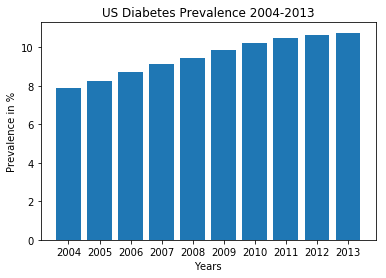

In [87]:
# Data for plotting
line = states_df.mean()


fig, ax = plt.subplots()
ax.bar(line.index, line.values)

ax.set(xlabel='Years', ylabel='Prevalence in %',
       title='US Diabetes Prevalence 2004-2013')
#ax.grid()

fig.savefig("./Images/line_2004_2013.png")
plt.show()

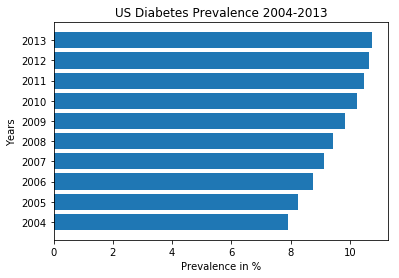

In [88]:
# Data for plotting
line = states_df.mean()


fig, ax = plt.subplots()
ax.barh(line.index, line.values)

ax.set(ylabel='Years', xlabel='Prevalence in %',
       title='US Diabetes Prevalence 2004-2013')

fig.savefig("./Images/bar_2004_2013.png")
plt.show()

In [92]:
states_df.head(1)

,State,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,code
0,Alabama,9.946269,10.50597,11.656716,12.474627,13.055224,13.897015,14.08209,14.477612,15.040299,15.489552,AL


In [103]:
df1 = states_df[['State','2013']].set_index('State')
df1.head(3)

,2013
State,
Alabama,15.489552
Alaska,6.700000
Arizona,11.093333


In [104]:
df1.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [112]:
ty

pandas.core.frame.DataFrame

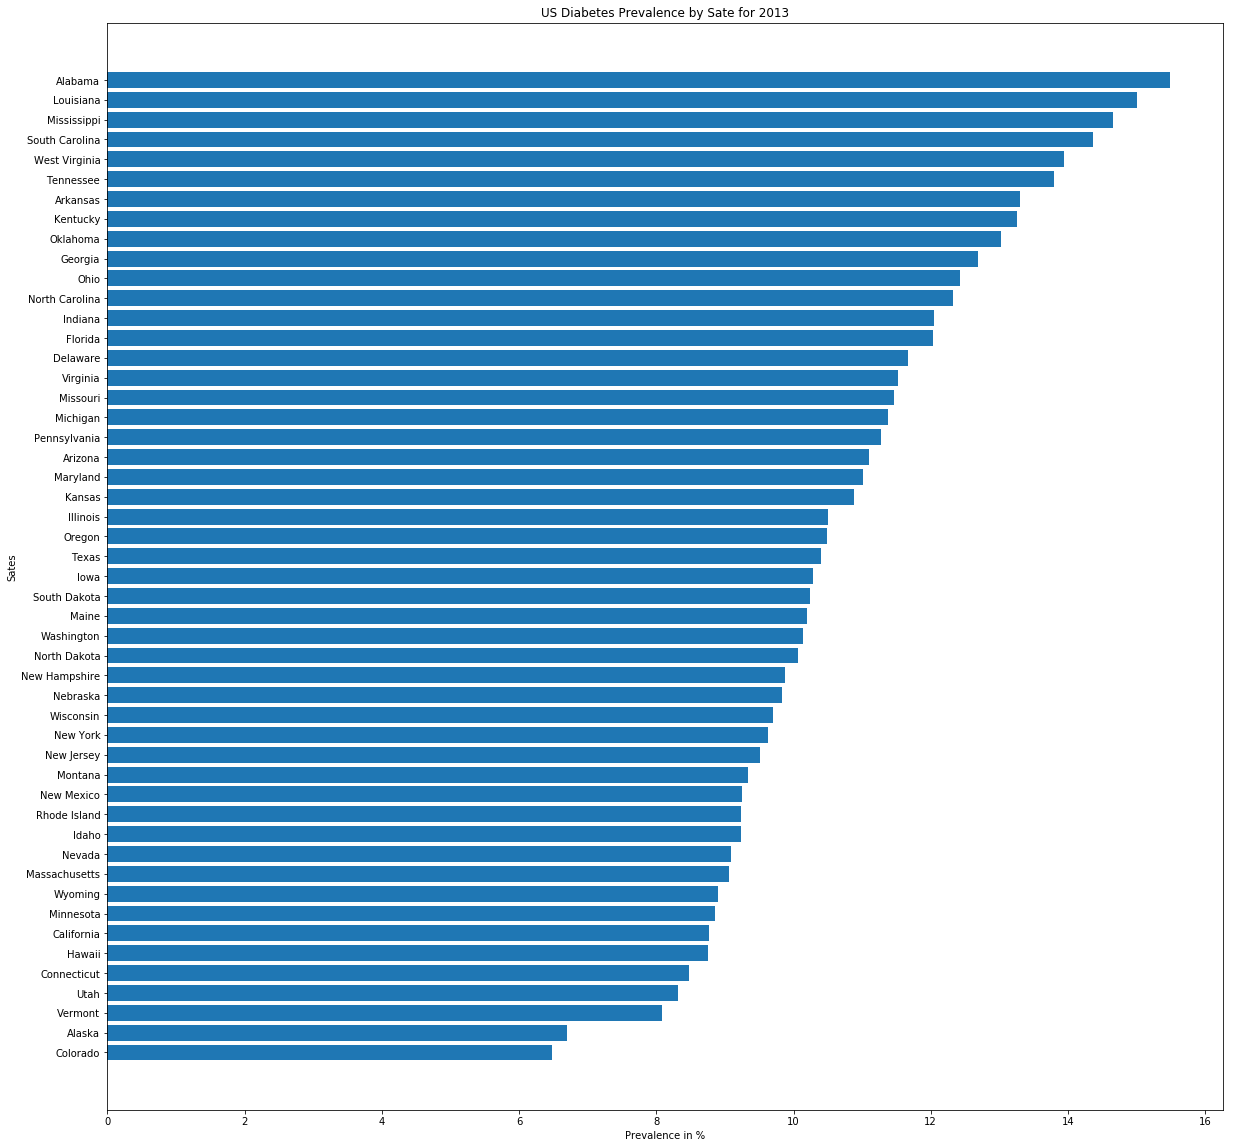

In [28]:
df1 = states_df[['State','2013']].set_index('State').sort_values('2013')
import matplotlib.pyplot as plt

#df1.index
#df1.values
#plt.subplots()
plt.figure(figsize=(20,20))

plt.barh(df1.index, df1['2013'])
plt.title('US Diabetes Prevalence by Sate for 2013')
plt.xlabel("Prevalence in %")
plt.ylabel("Sates")
plt.savefig("./Images/barh_2013.png")

#plt.show()

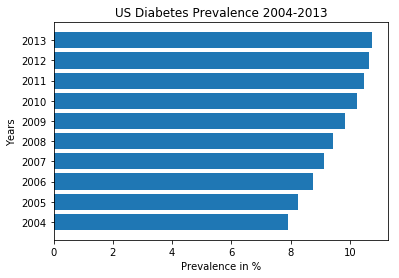

In [88]:
# Data for plotting
line = states_df.mean()


fig, ax = plt.subplots()
ax.barh(line.index, line.values)

ax.set(ylabel='Years', xlabel='Prevalence in %',
       title='US Diabetes Prevalence 2004-2013')

fig.savefig("./Images/bar_2004_2013.png")
plt.show()

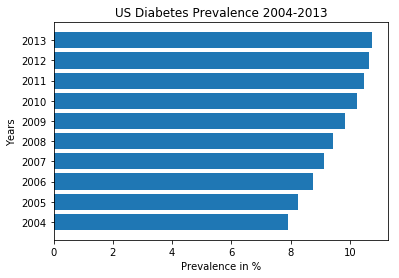

In [88]:
# Data for plotting
line = states_df.mean()


fig, ax = plt.subplots()
ax.barh(line.index, line.values)

ax.set(ylabel='Years', xlabel='Prevalence in %',
       title='US Diabetes Prevalence 2004-2013')

fig.savefig("./Images/bar_2004_2013.png")
plt.show()